# 2. Sumarização

## 2.1. Sumarizando avaliações de um hotel

In [1]:
%load_ext autoreload

%autoreload 2

In [ ]:
from llms.rag import load_data
df = load_data()

Loading data...
(222923, 22)
(222923, 22)
load_data took: 0.587890625


In [5]:
from llms.summary import prep_data

hotel_counts = prep_data(df)

Text(0.5, 1.0, 'Quantidade de hotéis com mais de 1000 avaliações')

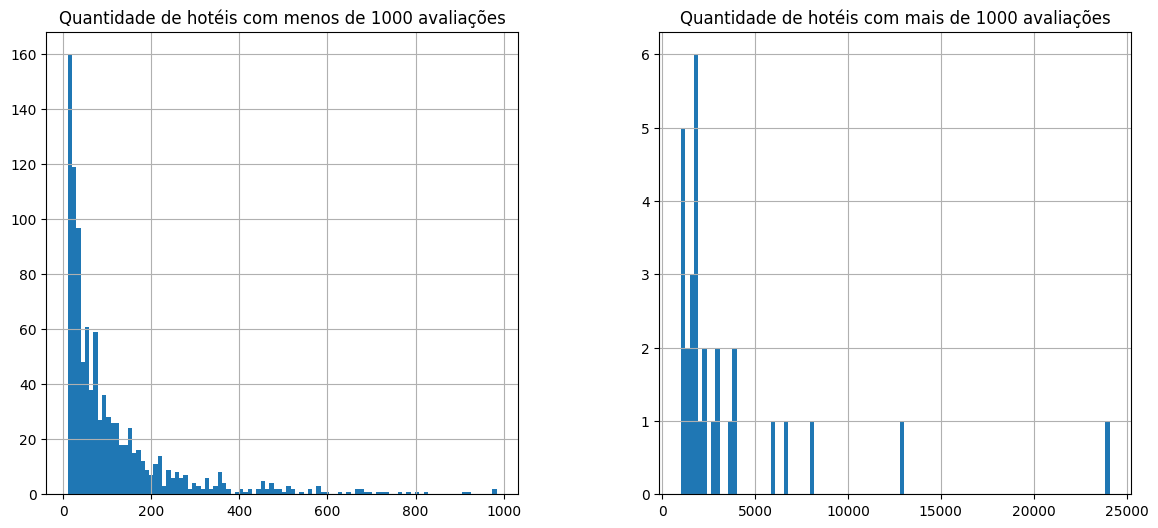

In [ ]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

hotel_counts[~hotel_counts.big].hist(bins=100, ax=axes[0])
hotel_counts[hotel_counts.big].hist(bins=100, ax=axes[1])
axes[0].set_title("Quantidade de hotéis com menos de 1000 avaliações")
axes[1].set_title("Quantidade de hotéis com mais de 1000 avaliações")

In [7]:
from llms.rag import load_rag

vector_store, rag_alias, embeddings_name = load_rag("google-ip")

load_rag...
load_embedding...
model_alias='google-4' model_data=('google', 'models/text-embedding-004') task_type='retrieval_query'
Loading GoogleGenerativeAIEmbeddings model...
embeddings=GoogleGenerativeAIEmbeddings(client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001E35460E610>, model='models/text-embedding-004', task_type='retrieval_query', google_api_key=SecretStr('**********'), credentials=None, client_options=None, transport=None, request_options=None)
rag_alias='google-ip' embedding_model_alias='google-4' embeddings_name='models/text-embedding-004' path_index='data/faiss_index_google_v4_ip'
Loading index...


  4%|▍         | 1/23 [00:00<00:02,  8.71it/s]

i=0 vector_store.index.ntotal=10000


 13%|█▎        | 3/23 [00:00<00:03,  5.12it/s]

i=1 vector_store.index.ntotal=20000
i=2 vector_store.index.ntotal=30000


 17%|█▋        | 4/23 [00:00<00:03,  5.77it/s]

i=3 vector_store.index.ntotal=40000


 22%|██▏       | 5/23 [00:01<00:04,  4.27it/s]

i=4 vector_store.index.ntotal=50000
i=5 vector_store.index.ntotal=60000


 39%|███▉      | 9/23 [00:01<00:01,  7.27it/s]

i=6 vector_store.index.ntotal=70000
i=7 vector_store.index.ntotal=72923
i=8 vector_store.index.ntotal=82923


 48%|████▊     | 11/23 [00:02<00:02,  5.35it/s]

i=9 vector_store.index.ntotal=92923
i=10 vector_store.index.ntotal=102923


 57%|█████▋    | 13/23 [00:02<00:01,  6.60it/s]

i=11 vector_store.index.ntotal=112923
i=12 vector_store.index.ntotal=122923


 61%|██████    | 14/23 [00:02<00:01,  7.17it/s]

i=13 vector_store.index.ntotal=132923


 65%|██████▌   | 15/23 [00:02<00:01,  4.61it/s]

i=14 vector_store.index.ntotal=142923


 74%|███████▍  | 17/23 [00:03<00:01,  5.21it/s]

i=15 vector_store.index.ntotal=152923
i=16 vector_store.index.ntotal=162923


 83%|████████▎ | 19/23 [00:03<00:00,  6.38it/s]

i=17 vector_store.index.ntotal=172923
i=18 vector_store.index.ntotal=182923


 87%|████████▋ | 20/23 [00:03<00:00,  6.55it/s]

i=19 vector_store.index.ntotal=192923


 96%|█████████▌| 22/23 [00:04<00:00,  4.81it/s]

i=20 vector_store.index.ntotal=202923
i=21 vector_store.index.ntotal=212923


100%|██████████| 23/23 [00:04<00:00,  5.47it/s]

i=22 vector_store.index.ntotal=222923
Index loaded.
load_index took: 4.2077953815460205


In [50]:
from llms.models import load_model

llm, model_name, max_new_tokens = load_model("gemini-2.0-flash")

load_model...
model_alias='gemini-2.0-flash' max_new_tokens=3000 model_data=('google', 'gemini-2.0-flash')
Loading ChatGoogleGenerativeAI model...
llm=ChatGoogleGenerativeAI(model='models/gemini-2.0-flash', google_api_key=SecretStr('**********'), temperature=0.0, max_output_tokens=3000, max_retries=5, timeout=10.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001E39B649ED0>, default_metadata=())
hf_pipe=<llms.models.GenericHuggingFacePipeline object at 0x000001E375A06F50>


In [77]:
from pathlib import Path
import os

summaries_folder = Path("data/hotel_summaries")
summaries_folder.mkdir(parents=True, exist_ok=True)

files = os.listdir(summaries_folder)
hotels_done = [f.replace(".pq","") for f in files]
hotel_counts_sample = hotel_counts[~hotel_counts.nome.isin(hotels_done)].iloc[0:1].copy()
hotel_counts_sample = hotel_counts_sample.reset_index(drop=True)
hotel_counts_sample

nome  count_   big
0  Costao do Santinho Resort    8160  True

In [78]:
hotel_counts_sample = hotel_counts[2:3].copy().reset_index(drop=True)
hotel_counts_sample

nome  count_   big
0  Costao do Santinho Resort    8160  True

In [ ]:
from llms.run_summary import run_make_summaries

results_summaries = run_make_summaries(
    df=df,
    hotel_counts=hotel_counts_sample,
    vector_store=vector_store,
    rag_alias=rag_alias,
    llm=llm,
    model_name=model_name,
    max_new_tokens=max_new_tokens,
)

run_make_summaries...


  0%|          | 0/1 [00:00<?, ?it/s]


i=0 hotel_name='Sol Grand Premium - All Inclusive' count_=12788 n_responses_full=1000 n_responses_topic=100
make_docs...
len(docs)=1000
query_model...
len(prompt)=346524
num_input_tokens=52203
len(response)=3547
response='## Resumo do Hotel Sol Grand Premium - All Inclusive\n\n**1. Infraestrutura e Acomodações:**\n\nOs hóspedes geralmente elogiam o tamanho e o conforto dos quartos, com camas confortáveis e ar condicionado eficiente. A decoração é frequentemente descrita como bonita e moderna, especialmente nos quartos reformados. No entanto, algumas avaliações mencionam quartos mais antigos com cheiro de mofo, mobiliário ultrapassado e problemas de manutenção, como vazamentos e chuveiros com pouca água quente. A limpeza é geralmente considerada boa, mas alguns hóspedes relatam problemas com poeira e falta de troca de lençóis. As piscinas são bem cuidadas e limpas, com espreguiçadeiras confortáveis, mas alguns mencionam a falta de escorregadores na piscina infantil e a necessidade de m

100%|██████████| 1/1 [01:05<00:00, 65.17s/it]

len(response)=3491
response='Aqui está um resumo do hotel "Sol Grand Premium - All Inclusive" com base nos tópicos solicitados:\n\n**1. Infraestrutura e Acomodações:**\n\n*   **Positivo:** Quartos amplos e confortáveis, especialmente os executivos com vista para o mar, camas confortáveis e boa limpeza. Oferece diversas opções de lazer, como piscinas, atividades para adultos e crianças, e acesso à praia com estrutura de apoio.\n*   **Negativo:** Estrutura envelhecida com necessidade de manutenção, incluindo ferrugem, infiltrações e elevadores quebrados. Alguns quartos são simples, com pouca proteção para crianças nas sacadas, ventilação inadequada e problemas como mofo, ar condicionado ineficiente e mobília antiga.\n\n**2. Atendimento e Serviço:**\n\n*   **Positivo:** Muitos hóspedes elogiam a cordialidade, atenção e eficiência dos funcionários em diversos setores, com vários nomes sendo mencionados pelo excelente serviço. A equipe de animação é elogiada pela energia e capacidade de ent

In [ ]:
import pandas as pd

df_results = pd.DataFrame(results_summaries)
hotel_counts_sample[list(results_summaries[0])] = df_results

In [ ]:
hotel_counts_sample

nome  count_   big        model_name  \
0  Sol Grand Premium - All Inclusive   12788  True  gemini-2.0-flash   

   max_new_tokens  rag_alias  \
0            3000  google-ip   

                                              prompt  \
0  \nVocê é um assistente de sumarização de hotéi...   

                                            response  \
0  ## Resumo do Hotel Sol Grand Premium - All Inc...   

                                           prompt_v2  \
0  \nVocê é um assistente de sumarização de hotéi...   

                                         response_v2  ...  \
0  Aqui está um resumo do hotel Sol Grand Premium...  ...   

                                        prompt_final  \
0  \nVocê é um assistente de sumarização de hotéi...   

                                      response_final  \
0  Aqui está um resumo do hotel "Sol Grand Premiu...   

                                             context  \
0  Informações gerais sobre o hotel:Hotel: Sol Gr...   

                                          context_v2  \
0  Informações gerais sobre o hotel:Hotel: Sol Gr...   

                                            contexts  \
0  [Informações gerais sobre o hotel:Hotel: Sol G...   

                                       context_final  \
0  A seguir, uma lista de resumos do hotel "Sol G...   

                                                info  \
0  {'input_tokens': 96464, 'output_tokens': 735, ...   

                                             info_v2  \
0  {'input_tokens': 93083, 'output_tokens': 599, ...   

                                               infos  \
0  [{'input_tokens': 14745, 'output_tokens': 472,...   

                                          info_final  
0  {'input_tokens': 5572, 'output_tokens': 801, '...  

[1 rows x 22 columns]

In [ ]:
from llms.run_summary import run_eval_summaries

results_scores = run_eval_summaries(
    hotel_counts=hotel_counts_sample,
    llm=llm,
    model_name=model_name,
    max_new_tokens=max_new_tokens,
)

run_eval_summaries...


  0%|          | 0/1 [00:00<?, ?it/s]


i=0 hotel_name='Sol Grand Premium - All Inclusive'
g_eval_scores...
Evaluating summary 0
metric_name='Relevância'
query_model...
len(prompt)=350121
num_input_tokens=52736
len(response)=1
response='4'
info={'input_tokens': 97222, 'output_tokens': 2, 'total_tokens': 97224, 'input_token_details': {'cache_read': 0}, 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}
Sleeping 2 seconds...
metric_name='Coerência'
query_model...
len(prompt)=350304
num_input_tokens=52783
len(response)=14
response='- Coerência: 4'
info={'input_tokens': 97281, 'output_tokens': 8, 'total_tokens': 97289, 'input_token_details': {'cache_read': 0}, 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}
Sleeping 2 seconds...
metric_name='Consistência'
query_model...
len(prompt)=350137
num_input_tokens=52733
len(response)=1
response='4'
info={'input_tokens': 97216, 'output_tokens': 2, 'total_tokens': 97218, 

100%|██████████| 1/1 [00:42<00:00, 42.12s/it]

score_final=4.5 scores=[5, 5, 5, 3]


In [ ]:
import pandas as pd

df_scores = pd.DataFrame(results_scores)
hotel_counts_sample[list(results_scores[0])] = df_scores
hotel_counts_sample

nome  count_   big        model_name  \
0  Sol Grand Premium - All Inclusive   12788  True  gemini-2.0-flash   

   max_new_tokens  rag_alias  \
0            3000  google-ip   

                                              prompt  \
0  \nVocê é um assistente de sumarização de hotéi...   

                                            response  \
0  ## Resumo do Hotel Sol Grand Premium - All Inc...   

                                           prompt_v2  \
0  \nVocê é um assistente de sumarização de hotéi...   

                                         response_v2  ...  \
0  Aqui está um resumo do hotel Sol Grand Premium...  ...   

                                               infos  \
0  [{'input_tokens': 14745, 'output_tokens': 472,...   

                                          info_final   eval_model_name  \
0  {'input_tokens': 5572, 'output_tokens': 801, '...  gemini-2.0-flash   

  eval_max_new_tokens                                             scores  \
0                3000  [{'index': 0, 'summary': '## Resumo do Hotel S...   

  scores_mean                                          scores_v2  \
0        3.75  [{'index': 0, 'summary': 'Aqui está um resumo ...   

  scores_mean_v2                                       scores_final  \
0            4.5  [{'index': 0, 'summary': 'Aqui está um resumo ...   

  scores_mean_final  
0               4.5  

[1 rows x 30 columns]

In [79]:
print(
    hotel_counts_sample.iloc[0],
)

nome      Costao do Santinho Resort
count_                         8160
big                            True
Name: 0, dtype: object


In [ ]:
hotel = hotel_counts_sample.iloc[0].nome
hotel

'Sol Grand Premium - All Inclusive'

In [ ]:
from pathlib import Path
summaries_folder = Path("data/hotel_summaries")
summaries_folder.mkdir(parents=True, exist_ok=True)
out_path = summaries_folder / f"{hotel}.pq"
hotel_counts_sample.to_parquet(out_path)
out_path

WindowsPath('data/hotel_summaries/Sol Grand Premium - All Inclusive.pq')

## 2.2. Resultados e Volumes

In [1]:
%load_ext autoreload

%autoreload 2

In [3]:
import pandas as pd

df_prep = pd.read_parquet("data/df_prep_2025-03-09_consolidado.pq")

In [ ]:
df_group = df_prep.groupby("place_name").agg(
    avaliacoes=("done","count"),
    avaliacoes_texto=("text","count"),
).reset_index()
df_group

In [ ]:
print(f"Número de avaliações raspadas: {df_prep.shape[0]}")
print(f'Número de avaliações com texto: {df_prep.query("text_n_words>0").shape[0]}')
print(f'Número de avaliações com >= 10 palavras: {df_prep.query("text_n_words>=10").shape[0]}')

Número de avaliações raspadas: 791313
Número de avaliações com texto: 461275
Número de avaliações com > 10 palavras: 222923


In [27]:
print(f"Número de hotéis raspados: {df_group.place_name.nunique()}")
print(f'Número de hotéis com >= 10 avaliações: {df_group.query("avaliacoes>=10").shape[0]}')
print(f'Número de hotéis com >= 100 avaliações: {df_group.query("avaliacoes>=100").shape[0]}')
print(f'Número de hotéis com >= 1000 avaliações: {df_group.query("avaliacoes>=1000").shape[0]}')

Número de hotéis raspados: 1129
Número de hotéis com >= 10 avaliações: 1119
Número de hotéis com >= 100 avaliações: 803
Número de hotéis com >= 1000 avaliações: 142


In [29]:
print(f'Número de hotéis com >= 10 avaliações com texto: {df_group.query("avaliacoes_texto>=10").shape[0]}')
print(f'Número de hotéis com >= 100 avaliações com texto: {df_group.query("avaliacoes_texto>=100").shape[0]}')
print(f'Número de hotéis com >= 1000 avaliações com texto: {df_group.query("avaliacoes_texto>=1000").shape[0]}')

Número de hotéis com >= 10 avaliações com texto: 1101
Número de hotéis com >= 100 avaliações com texto: 643
Número de hotéis com >= 1000 avaliações com texto: 69


In [30]:
from llms.rag import load_data
df = load_data()

Loading data...
(222923, 22)
(222923, 22)
load_data took: 0.4837372303009033


In [31]:
from llms.summary import prep_data

hotel_counts = prep_data(df)

Text(0.5, 1.0, 'Quantidade de hotéis com mais de 1000 avaliações')

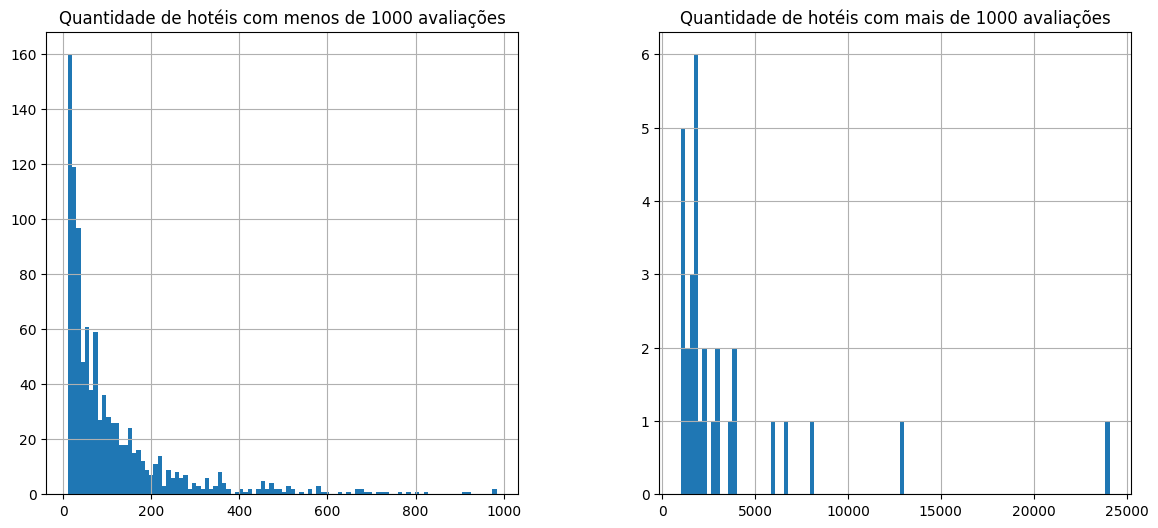

In [32]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

hotel_counts[~hotel_counts.big].hist(bins=100, ax=axes[0])
hotel_counts[hotel_counts.big].hist(bins=100, ax=axes[1])
axes[0].set_title("Quantidade de hotéis com menos de 1000 avaliações")
axes[1].set_title("Quantidade de hotéis com mais de 1000 avaliações")

In [1]:
from pathlib import Path
import os

summaries_folder = Path("data/hotel_summaries")
summaries_folder.mkdir(parents=True, exist_ok=True)

files = os.listdir(summaries_folder)
len(files)

111

In [2]:
import pandas as pd

hotels = []
for file in files:
    dfi = pd.read_parquet(summaries_folder / file)
    hotels.append(dfi)
df_results = pd.concat(hotels).reset_index(drop=True)

In [3]:
df_results.filter(regex="scores_mean").mean()

scores_mean          4.027523
scores_mean_v2       4.089450
scores_mean_final    4.153670
dtype: float64

In [39]:
df_results = df_results.sort_values("count_", ascending=False).reset_index(drop=True)

In [40]:
df_results[["nome","response_final"]]

for i, hotel in df_results.iloc[:2].iterrows():
    print("="*100)
    print(f"RESUMO DO HOTEL: {hotel.nome}\n{hotel.response_final}\n")

RESUMO DO HOTEL: Grand Palladium Imbassaí Resort & Spa
**Grand Palladium Imbassaí Resort & Spa: Resumo Detalhado por Tópicos**

1.  **Infraestrutura e Acomodações:** O hotel oferece uma infraestrutura geralmente elogiada, com quartos espaçosos, confortáveis e bem equipados, além de instalações de lazer como piscinas amplas e diversas opções de esportes. A limpeza é frequentemente destacada como um ponto forte. No entanto, alguns hóspedes relatam problemas com a manutenção dos quartos, incluindo ar-condicionado ineficiente, limpeza inadequada, falta de reposição de itens e até mesmo goteiras. A superlotação da piscina principal e a distância da praia, com transporte precário, também são pontos negativos.

2.  **Atendimento e Serviço:** Muitos hóspedes elogiam a cordialidade e presteza dos funcionários em diversos setores, mencionando nomes específicos como exemplos de excelência. A limpeza e organização também são pontos fortes, assim como a eficiência no serviço de quarto. Por outro la

In [45]:
# Abordagem de Resumo 1 
print(df_results.iloc[-1].prompt)


Você é um assistente de sumarização de hotéis em português.
Utilize os seguintes trechos de CONTEXTO recuperado de avaliações de hotéis para escrever o RESUMO.
Siga as INSTRUÇÕES do usuário para escrever um resumo detalhado do que se pede.

CONTEXTO:
Informações gerais sobre o hotel:Hotel: Hotel Vitória Marchi, 0 Estrelas.
Região:SUDESTE; Estado:SÃO PAULO; Cidade:Serra Negra
Tipo:Hotel; Classificação:4.6; Quantidade Avaliações:1056

Top 369 avaliações do hotel mais semelhantes à pergunta:
 - Avaliação 1
Nota:5; Curtidas:0; Usuário é guia local; Nota Quartos:5; Nota Localização:5; Nota Serviço:5
Avaliação: O hotel está em excelente localização. Fui para almoçar no restaurante deles. Comida fresquinha e maravilhosa. Bom tempero e sabor. Inúmeras opções de saladas, carnes e sobremesas. Um local aconchegante. Tem também opções de sucos e refrigerantes.

 - Avaliação 2
Nota:5; Curtidas:0; Usuário é guia local; Nota Quartos:4; Nota Localização:5; Nota Serviço:4
Avaliação: Hotel acolhedor co

In [46]:
# Abordagem de Resumo 2
print(df_results.iloc[-1].prompt_v2)


Você é um assistente de sumarização de hotéis em português.
Utilize os seguintes trechos de CONTEXTO recuperado de avaliações de hotéis para escrever o RESUMO.
Siga as INSTRUÇÕES do usuário para escrever um resumo detalhado do que se pede.

CONTEXTO:
Informações gerais sobre o hotel:Hotel: Hotel Vitória Marchi, 0 Estrelas.
Região:SUDESTE; Estado:SÃO PAULO; Cidade:Serra Negra
Tipo:Hotel; Classificação:4.6; Quantidade Avaliações:1056

Top 369 avaliações do hotel mais semelhantes à pergunta:
 - Avaliação 1, Similaridade: 0.493
Nota:5; Curtidas:0; Usuário é guia local; Nota Quartos:4; Nota Localização:5; Nota Serviço:5
Avaliação: Poderia ter uma prateleira na parede para colocar as malas,para não ter que deixar no chão.!!

 - Avaliação 2, Similaridade: 0.530
Nota:5; Curtidas:0; Usuário é guia local
Avaliação: Frequento apenas nos almoços, simplesmente delicioso, possui uma variedade no qual todos aproveitam. Uma dica é experimentar a maionese com batatas  excepcional. Valores para almoço 

In [50]:
# Abordagem de Resumo 3
display(df_results.iloc[-1].prompts)
print(df_results.iloc[-1].prompt_final)

array(['\nVocê é um assistente de sumarização de hotéis em português.\nUtilize os seguintes trechos de CONTEXTO recuperado de avaliações de hotéis para escrever o RESUMO.\nSiga as INSTRUÇÕES do usuário para escrever um resumo detalhado do que se pede.\n\nCONTEXTO:\nInformações gerais sobre o hotel:Hotel: Hotel Vitória Marchi, 0 Estrelas.\nRegião:SUDESTE; Estado:SÃO PAULO; Cidade:Serra Negra\nTipo:Hotel; Classificação:4.6; Quantidade Avaliações:1056\n\nTop 100 avaliações do hotel mais semelhantes à pergunta:\n - Avaliação 1, Similaridade: 0.640\nNota:5; Curtidas:1; Usuário é guia local\nAvaliação: Ótima experiência, excelente atendimento, limpeza impecável. Amei estar em um ambiente super acolhedor com pessoas que te tratam como amigos.\n\n - Avaliação 2, Similaridade: 0.640\nNota:3; Curtidas:0; Usuário é guia local\nAvaliação: Atendimento muito bom quarto bem limpos localização muito boa e orevo acessível ,comida boa café da manhã muito bom.Foi a primeira vez em Serra Negra e semore qu


Você é um assistente de sumarização de hotéis em português.
Utilize os seguintes trechos de CONTEXTO recuperado de avaliações de hotéis para escrever o RESUMO.
Siga as INSTRUÇÕES do usuário para escrever um resumo detalhado do que se pede.

CONTEXTO:
A seguir, uma lista de resumos do hotel "Hotel Vitória Marchi" por tópico e aspecto:Aspectos positivos do hotel no quesito "Infraestrutura e Acomodações – Conforto, limpeza, tecnologia, lazer, estacionamento.":
O Hotel Vitória Marchi em Serra Negra é frequentemente elogiado por sua limpeza impecável e ambiente acolhedor. Os quartos são considerados confortáveis, embora alguns hóspedes mencionem que as camas poderiam ser melhores e alguns quartos são pequenos. O hotel oferece apartamentos separados para famílias ou grupos maiores.

No quesito lazer, o hotel possui piscina aquecida.

Apesar de sua localização central e conveniente, o hotel não possui estacionamento próprio, o que pode ser um inconveniente para alguns hóspedes, sendo necessá

In [63]:
# Avaliação de Abordagem de Resumo 1 
print(df_results.iloc[-1].scores)
for score in df_results.iloc[-1].scores:
    print(score["score"])
print(df_results.iloc[-1].scores[0]["prompt"])

[{'index': 0, 'info': {'finish_reason': 'STOP', 'input_token_details': {'cache_read': 0}, 'input_tokens': 30068, 'output_tokens': 8, 'prompt_feedback': {'block_reason': 0, 'safety_ratings': array([], dtype=object)}, 'safety_ratings': array([], dtype=object), 'total_tokens': 30076}, 'metric_name': 'Relevância', 'prompt': '\nVocê receberá um resumo escrito para um artigo. Sua tarefa é avaliar o resumo com base em um critério específico.  \nCertifique-se de ler e entender essas instruções com muito cuidado.  \nMantenha este documento aberto enquanto revisa e consulte-o conforme necessário.  \n\n**Critério de Avaliação:**  \n\n\nRelevância (1-5) - seleção do conteúdo importante do texto original.  \nO resumo deve incluir apenas informações essenciais do documento-fonte.  \nOs avaliadores devem penalizar resumos que contenham redundâncias ou informações excessivas.  \n  \n\n**Etapas de Avaliação:**  \n\n \n1. Leia atentamente o resumo e o documento-fonte.  \n2. Compare o resumo com o docume

## 2.3. Comparação entre resumos e modelos

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from pathlib import Path
import os
import pandas as pd

summaries_folder = Path("data/hotel_summaries")

def load_summaries(summaries_folder):
    summaries_folder = Path(summaries_folder)
    files = os.listdir(summaries_folder)
    print(summaries_folder, len(files))
    hotels = []
    for file in files:
        dfi = pd.read_parquet(summaries_folder / file)
        hotels.append(dfi)
    df_results = pd.concat(hotels).reset_index(drop=True)
    return df_results

In [3]:
summaries_v1 = [
    "summaries_gemini-2.0-flash",
    "summaries_gemini-1.5-flash",
    "summaries_gemini-1.5-flash-8b",
    "summaries_gte_gemini-2.0-flash-lite",
    "summaries_2000_gemini-2.0-flash",
]

import glob
summaries_v2 = [f for f in glob.glob("data/summaries_v2*")]
summaries_v2

dfs = []
for s in summaries_v2:
    df = load_summaries(s)
    df["summary_name"] = s.replace("data\\","")
    dfs.append(df)

data\summaries_v2_google-ip_gemini-1.5-flash-8b_1000 91
data\summaries_v2_google-ip_gemini-2.0-flash_1000 100


In [5]:
df_results = pd.concat(dfs)
print(f"{df_results.shape=}")
df_na = df_results[df_results.isna().any(axis=1)]
df_results = df_results[~df_results.isna().any(axis=1)]
print(f"{df_results.shape=}")

df_results.shape=(191, 35)
df_results.shape=(186, 35)


In [9]:
df_na[["summaries_name","nome","scores"]]

summaries_name  \
32  summaries_v2_google-ip_gemini-1.5-flash-8b_1000   
72  summaries_v2_google-ip_gemini-1.5-flash-8b_1000   
36     summaries_v2_google-ip_gemini-2.0-flash_1000   
76     summaries_v2_google-ip_gemini-2.0-flash_1000   
79     summaries_v2_google-ip_gemini-2.0-flash_1000   

                                  nome scores  
32           Hotel Fazenda São Matheus    NaN  
72              Quilombo Hotel Fazenda    NaN  
36  Hotel Fazenda Boa Vista Bananal SP    NaN  
76             Pousada Villa dos Leais    NaN  
79              Quilombo Hotel Fazenda    NaN

In [10]:
n_sums = df_results.summary_name.nunique()
print(f"{n_sums=}")
hotel_counts = df_results.groupby("nome").count().iloc[:,0]
print(f"{len(hotel_counts)=}")
hotels_common = hotel_counts[hotel_counts == n_sums].index
print(f"{len(hotels_common)=}")

n_sums=2
len(hotel_counts)=99
len(hotels_common)=87


In [11]:
df_results_common = df_results[df_results.nome.isin(hotels_common)].copy()
print(f"{df_results_common.shape=}")

df_results_common.shape=(174, 35)


In [12]:
import numpy as np

metrics = {
    "m_relevancia":5,
    "m_coerencia":5,
    "m_consistencia":5,
    "m_fluencia":3,
}

def make_groups(df_results):
    for c, e in zip(["scores", "scores_v2", "scores_final"],["","_v2","_final"]):
        df_results[c+"_"] = df_results[c].apply(lambda x: [xs["score"] for xs in x] if not isinstance(x, float) else [np.nan,np.nan,np.nan,np.nan])
        for i, (m,w) in enumerate(metrics.items()):
            df_results[m+e] = df_results[c+"_"].apply(lambda x: x[i]/w)
        df_results[c+"_wavg"] = df_results[[m+e for m in metrics]].mean(axis=1)
    df_group = df_results.filter(regex="summary_name|^m_|mean|wavg").groupby("summary_name").mean()
    return df_group

In [13]:
df_group = make_groups(df_results_common)

In [14]:
df_group[["scores_mean","scores_wavg","m_relevancia","m_coerencia","m_consistencia","m_fluencia"]].sort_values("scores_wavg", ascending=False)

scores_mean  scores_wavg  \
summary_name                                                                
summaries_v2_google-ip_gemini-2.0-flash_1000        3.433908     0.758429   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000     3.382184     0.748851   

                                                 m_relevancia  m_coerencia  \
summary_name                                                                 
summaries_v2_google-ip_gemini-2.0-flash_1000         0.742529     0.788506   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000      0.728736     0.770115   

                                                 m_consistencia  m_fluencia  
summary_name                                                                 
summaries_v2_google-ip_gemini-2.0-flash_1000           0.786207    0.716475  
summaries_v2_google-ip_gemini-1.5-flash-8b_1000        0.772414    0.724138

In [15]:
df_group.filter(regex="v2").sort_values("scores_v2_wavg", ascending=False)

scores_mean_v2  \
summary_name                                                      
summaries_v2_google-ip_gemini-2.0-flash_1000           3.425287   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000        3.379310   

                                                 m_relevancia_v2  \
summary_name                                                       
summaries_v2_google-ip_gemini-2.0-flash_1000            0.749425   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000         0.737931   

                                                 m_coerencia_v2  \
summary_name                                                      
summaries_v2_google-ip_gemini-2.0-flash_1000           0.767816   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000        0.763218   

                                                 m_consistencia_v2  \
summary_name                                                         
summaries_v2_google-ip_gemini-2.0-flash_1000              0.783908   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000           0.786207   

                                                 m_fluencia_v2  scores_v2_wavg  
summary_name                                                                    
summaries_v2_google-ip_gemini-2.0-flash_1000          0.731801        0.758238  
summaries_v2_google-ip_gemini-1.5-flash-8b_1000       0.693487        0.745211

In [16]:
df_group.filter(regex="final").sort_values("scores_final_wavg", ascending=False)

scores_mean_final  \
summary_name                                                         
summaries_v2_google-ip_gemini-2.0-flash_1000              3.577586   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000           3.313218   

                                                 m_relevancia_final  \
summary_name                                                          
summaries_v2_google-ip_gemini-2.0-flash_1000               0.758621   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000            0.680460   

                                                 m_coerencia_final  \
summary_name                                                         
summaries_v2_google-ip_gemini-2.0-flash_1000              0.793103   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000           0.751724   

                                                 m_consistencia_final  \
summary_name                                                            
summaries_v2_google-ip_gemini-2.0-flash_1000                 0.901149   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000              0.806897   

                                                 m_fluencia_final  \
summary_name                                                        
summaries_v2_google-ip_gemini-2.0-flash_1000             0.681992   
summaries_v2_google-ip_gemini-1.5-flash-8b_1000          0.685824   

                                                 scores_final_wavg  
summary_name                                                        
summaries_v2_google-ip_gemini-2.0-flash_1000              0.783716  
summaries_v2_google-ip_gemini-1.5-flash-8b_1000           0.731226

# Testando G-eval

In [13]:
mistake = df_results_common[df_results_common.response.str.len() > 8000].iloc[0]
print(mistake.scores[0]["prompt"])
mistake.scores[0]


Você receberá um resumo escrito para um artigo. Sua tarefa é avaliar o resumo com base em um critério específico.  
Certifique-se de ler e entender essas instruções com muito cuidado.  
Mantenha este documento aberto enquanto revisa e consulte-o conforme necessário.  

**Critério de Avaliação:**  


Relevância (1-5) - seleção do conteúdo importante do texto original.  
O resumo deve incluir apenas informações essenciais do documento-fonte.  
Os avaliadores devem penalizar resumos que contenham redundâncias ou informações excessivas.  
  

**Etapas de Avaliação:**  

 
1. Leia atentamente o resumo e o documento-fonte.  
2. Compare o resumo com o documento-fonte e identifique os principais pontos do artigo.  
3. Avalie o quanto o resumo cobre os principais pontos do artigo e se contém informações irrelevantes ou redundantes.  
4. Atribua uma pontuação de relevância de 1 a 5.  
  

**Exemplo:**  

**Texto Original:**  

Informações gerais sobre o hotel:Hotel: Sol Grand Premium - All Incl

{'index': 0,
 'info': {'finish_reason': 'STOP',
  'input_token_details': {'cache_read': 0},
  'input_tokens': 189464,
  'output_tokens': 2,
  'prompt_feedback': {'block_reason': 0,
   'safety_ratings': array([], dtype=object)},
  'safety_ratings': array([], dtype=object),
  'total_tokens': 189466},
 'metric_name': 'Relevância',
 'prompt': '\nVocê receberá um resumo escrito para um artigo. Sua tarefa é avaliar o resumo com base em um critério específico.  \nCertifique-se de ler e entender essas instruções com muito cuidado.  \nMantenha este documento aberto enquanto revisa e consulte-o conforme necessário.  \n\n**Critério de Avaliação:**  \n\n\nRelevância (1-5) - seleção do conteúdo importante do texto original.  \nO resumo deve incluir apenas informações essenciais do documento-fonte.  \nOs avaliadores devem penalizar resumos que contenham redundâncias ou informações excessivas.  \n  \n\n**Etapas de Avaliação:**  \n\n \n1. Leia atentamente o resumo e o documento-fonte.  \n2. Compare o 

In [14]:
print(mistake.response)

Aqui está um resumo do hotel Sol Grand Premium - All Inclusive, com base nas avaliações fornecidas, organizado por tópicos:

**1. Infraestrutura e Acomodações:**

Os hóspedes geralmente elogiam a decoração e o conforto dos quartos, especialmente nas alas reformadas, destacando a limpeza, organização e camas confortáveis. A vista dos quartos também é apreciada. No entanto, algumas avaliações mencionam quartos mais antigos com problemas como cheiro de mofo, ar condicionado fraco, chuveiros que não aquecem, infiltrações, e falta de manutenção, como armários danificados e falta de iluminação. Alguns hóspedes relataram barulho de obras em determinados horários.

**2. Atendimento e Serviço:**

O atendimento é frequentemente citado como um ponto forte do hotel, com muitos hóspedes elogiando a cordialidade, presteza e simpatia dos funcionários. Nomes como Sueli Souza, Miriam, Mércia (do suquinho), Paulo (da animação), Grazi, Karol, Jeane, Matheus, Luiz André, Célia, Rebeca, Jussara, Clerlesne,

In [15]:
from llms.models import load_model
llm, model_name, max_new_tokens = load_model("gemini-2.0-flash")

load_model...
model_alias='gemini-2.0-flash' max_new_tokens=3000 model_data=('google', 'gemini-2.0-flash')
Loading ChatGoogleGenerativeAI model...
llm=ChatGoogleGenerativeAI(model='models/gemini-2.0-flash', google_api_key=SecretStr('**********'), temperature=0.0, max_output_tokens=3000, max_retries=5, timeout=10.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x00000271E446D250>, default_metadata=())
hf_pipe=<llms.models.GenericHuggingFacePipeline object at 0x00000271E420E890>


In [16]:
def extract_scores(scores):
    return [d["score"] for d in scores]

In [17]:
print(mistake.scores_, mistake.scores_mean)

[4, 5, 5, 3] 4.25


In [22]:
from llms.g_eval import g_eval_scores

summaries = [mistake.response]
document = mistake.context

scores_original, scores_original_mean = g_eval_scores(summaries, document, llm, sleep=0)

g_eval_scores...
Evaluating summary 0
metric_name='Relevância'
query_model...
len(prompt)=669212
num_input_tokens=100227
len(response)=15
response='- Relevância: 5'
info={'input_tokens': 189464, 'output_tokens': 8, 'total_tokens': 189472, 'input_token_details': {'cache_read': 0}, 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}
Sleeping 0 seconds...
metric_name='Coerência'
query_model...
len(prompt)=669395
num_input_tokens=100274
len(response)=14
response='- Coerência: 5'
info={'input_tokens': 189523, 'output_tokens': 8, 'total_tokens': 189531, 'input_token_details': {'cache_read': 0}, 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}
Sleeping 0 seconds...
metric_name='Consistência'
query_model...
len(prompt)=669228
num_input_tokens=100224
len(response)=1
response='5'
info={'input_tokens': 189458, 'output_tokens': 2, 'total_tokens': 189460, 'input_token_details': {'cac

In [23]:
print(extract_scores(scores_original), scores_original_mean)

[5, 5, 5, 3] 4.5


In [190]:
print(mistake.scores.tolist()[0]["prompt"])


Você receberá um resumo escrito para um artigo. Sua tarefa é avaliar o resumo com base em um critério específico.  
Certifique-se de ler e entender essas instruções com muito cuidado.  
Mantenha este documento aberto enquanto revisa e consulte-o conforme necessário.  

**Critério de Avaliação:**  


Relevância (1-5) - seleção do conteúdo importante do texto original.  
O resumo deve incluir apenas informações essenciais do documento-fonte.  
Os avaliadores devem penalizar resumos que contenham redundâncias ou informações excessivas.  
  

**Etapas de Avaliação:**  

 
1. Leia atentamente o resumo e o documento-fonte.  
2. Compare o resumo com o documento-fonte e identifique os principais pontos do artigo.  
3. Avalie o quanto o resumo cobre os principais pontos do artigo e se contém informações irrelevantes ou redundantes.  
4. Atribua uma pontuação de relevância de 1 a 5.  
  

**Exemplo:**  

**Texto Original:**  

Informações gerais sobre o hotel:Hotel: Sol Grand Premium - All Incl

In [191]:
print(scores_original[0]["prompt"])


Você receberá um resumo escrito para um artigo. Sua tarefa é avaliar o resumo com base em um critério específico.  
Certifique-se de ler e entender essas instruções com muito cuidado.  
Mantenha este documento aberto enquanto revisa e consulte-o conforme necessário.  

**Critério de Avaliação:**  


Relevância (1-5) - seleção do conteúdo importante do texto original.  
O resumo deve incluir apenas informações essenciais do documento-fonte.  
Os avaliadores devem penalizar resumos que contenham redundâncias ou informações excessivas.  
  

**Etapas de Avaliação:**  

 
1. Leia atentamente o resumo e o documento-fonte.  
2. Compare o resumo com o documento-fonte e identifique os principais pontos do artigo.  
3. Avalie o quanto o resumo cobre os principais pontos do artigo e se contém informações irrelevantes ou redundantes.  
4. Atribua uma pontuação de relevância de 1 a 5.  
  

**Exemplo:**  

**Texto Original:**  

Informações gerais sobre o hotel:Hotel: Sol Grand Premium - All Incl

In [18]:
from llms.g_eval_v2 import g_eval_scores, EVALUATION_PROMPT_TEMPLATE

EVALUATION_PROMPT_TEMPLATE

'\nVocê receberá um RESUMO de um hotel feito a partir de avaliações de usuários,\ncontendo os seguintes tópicos: Infraestrutura e Acomodações; Atendimento e Serviço; Localização e Acessibilidade; Alimentação e Bebidas; Experiência e Entretenimento; Custo-benefício e Políticas.\nSua tarefa é avaliar o RESUMO com base em um critério específico, comparando-o com o TEXTO ORIGINAL.\nCertifique-se de ler e entender essas instruções com muito cuidado.\nMantenha este documento aberto enquanto revisa e consulte-o conforme necessário.\nSeja bastante rigoroso na avaliação.\n\n**CRITÉRIO DE AVALIAÇÃO:**\n\n{criteria}\n\n**ETAPAS DE AVALIAÇÃO:**\n\n{steps}\n\n**TEXTO ORIGINAL:**\n\n{document}\n\n**RESUMO:**\n\n{summary}\n\n**FORMULÁRIO DE AVALIAÇÃO:** (responda APENAS com o número da pontuação do critério de avaliação, sem explicar)\n\n- Nota de {metric_name}: '

In [19]:
from llms.g_eval_v2 import g_eval_scores

summaries = [mistake.response]
document = mistake.context

scores, scores_mean = g_eval_scores(summaries, document, llm, sleep=0)

g_eval_scores...
Evaluating summary 0
metric_name='Relevância'
query_model...
len(prompt)=669518
num_input_tokens=100279
len(response)=1
response='4'
info={'input_tokens': 189543, 'output_tokens': 2, 'total_tokens': 189545, 'input_token_details': {'cache_read': 0}, 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}
Sleeping 0 seconds...
metric_name='Coerência'
query_model...
len(prompt)=669684
num_input_tokens=100319
len(response)=1
response='4'
info={'input_tokens': 189594, 'output_tokens': 2, 'total_tokens': 189596, 'input_token_details': {'cache_read': 0}, 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}
Sleeping 0 seconds...
metric_name='Consistência'
query_model...
len(prompt)=669542
num_input_tokens=100279
len(response)=1
response='5'
info={'input_tokens': 189544, 'output_tokens': 2, 'total_tokens': 189546, 'input_token_details': {'cache_read': 0}, 'prompt_feedbac

In [21]:
print(extract_scores(scores), scores_mean)

[4, 4, 5, 1] 3.5
